In [1]:
import numpy as np
import pandas as pd

In [2]:
df_reviews = pd.read_csv('./data/reviews.csv', delimiter=',', decimal='.', encoding='UTF-8')
df_reviews.head()

,id_review,review,title,score,likes,id_nick,service,date,platform
0,R1245,Muy buena presentación y servicio sin embargo ...,Muy buena presentación y servicio,3.0,0,uisahelenad2018,71036.0,1 years ago,tripadvisor
1,R1246,Desde la presentación de los platos a la calid...,Una experiencia,5.0,0,turrutia,71036.0,1 years ago,tripadvisor
2,R1247,El mejor lugar para reencontrame con mis amigo...,Felicitaciones a Statera!,5.0,0,orthStar25333985745,71036.0,1 years ago,tripadvisor
3,R1248,Excelente experiencia Comida maravillosa con e...,Aniversario de boda,5.0,0,atima J,71036.0,1 years ago,tripadvisor
4,R1249,Mi pasión es viajar y disfrutar de las grandez...,No te lo querrás perder!,5.0,0,nbocadoalmundo,71036.0,1 years ago,tripadvisor


In [3]:
df_sentimientos = pd.read_csv('./data/sentimientos1.csv', delimiter=',', decimal='.', encoding='UTF-8')
df_sentimientos.head()

,id_review,polarity,num_score
0,R1245,3,0.3231
1,R1246,4,0.5124
2,R1247,5,0.8311
3,R1248,5,0.9053
4,R1249,5,0.6696


In [4]:
df_reviews.set_index('id_review', inplace=True)
df_sentimientos.set_index('id_review', inplace=True)

# Unión basada en el índice
df_reviews2 = df_reviews.join(df_sentimientos, how='inner')  # how='inner' para una intersección
df_reviews2.head()

,review,title,score,likes,id_nick,service,date,platform,polarity,num_score
id_review,,,,,,,,,,
R1245,Muy buena presentación y servicio sin embargo ...,Muy buena presentación y servicio,3.0,0,uisahelenad2018,71036.0,1 years ago,tripadvisor,3,0.3231
R1246,Desde la presentación de los platos a la calid...,Una experiencia,5.0,0,turrutia,71036.0,1 years ago,tripadvisor,4,0.5124
R1247,El mejor lugar para reencontrame con mis amigo...,Felicitaciones a Statera!,5.0,0,orthStar25333985745,71036.0,1 years ago,tripadvisor,5,0.8311
R1248,Excelente experiencia Comida maravillosa con e...,Aniversario de boda,5.0,0,atima J,71036.0,1 years ago,tripadvisor,5,0.9053
R1249,Mi pasión es viajar y disfrutar de las grandez...,No te lo querrás perder!,5.0,0,nbocadoalmundo,71036.0,1 years ago,tripadvisor,5,0.6696


In [5]:
df_reviews2 = df_reviews2[
    (df_reviews2['review'].notna()) &  # Excluye valores nulos
    (df_reviews2['review'].str.strip() != '')  # Excluye strings vacíos o solo con espacios
]

In [6]:
df_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755066 entries, R1245 to R1714817
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   review     755066 non-null  object 
 1   title      755066 non-null  object 
 2   score      755066 non-null  float64
 3   likes      755066 non-null  int64  
 4   id_nick    755066 non-null  object 
 5   service    755066 non-null  float64
 6   date       755066 non-null  object 
 7   platform   755066 non-null  object 
 8   polarity   755066 non-null  int64  
 9   num_score  755066 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 63.4+ MB


In [7]:
columnas_a_borrar4 = ['review', 'title', 'date', 'id_nick', 'likes']
df_reviews2 = df_reviews2.drop(columns=columnas_a_borrar4)

diccionario_mapeo = {"googleplaces": 1, "tripadvisor": 2}
df_reviews2['platform'] = df_reviews2['platform'].map(diccionario_mapeo)

df_reviews2.head()

,score,service,platform,polarity,num_score
id_review,,,,,
R1245,3.0,71036.0,2,3,0.3231
R1246,5.0,71036.0,2,4,0.5124
R1247,5.0,71036.0,2,5,0.8311
R1248,5.0,71036.0,2,5,0.9053
R1249,5.0,71036.0,2,5,0.6696


In [8]:
df_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755066 entries, R1245 to R1714817
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   score      755066 non-null  float64
 1   service    755066 non-null  float64
 2   platform   755066 non-null  int64  
 3   polarity   755066 non-null  int64  
 4   num_score  755066 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 34.6+ MB


In [9]:
df_clusters = pd.read_csv('./data/tags_cluster.csv', delimiter=',', decimal='.', encoding='UTF-8')
df_clusters.head()

,palabra,cluster
0,Promotora inmobiliaria,0
1,Turoperador,0
2,Carnicería,0
3,Brasería,0
4,Copistería,0


In [10]:
df_restaurants = pd.read_csv('./data/restaurantes_final.csv', delimiter=',', decimal='.', encoding='UTF-8')
df_restaurants.head()

,id,name,tag,x,y,district,IDDIST,direction,stars,n_reviews,...,max_price,platform,cnt_simbolos,tag_lista,tag1,tag2,tag3,tipo_tag1,tipo_tag2,tipo_tag3
0,71036,Restaurante Statera,$$$$||Peruana||contemporánea||Opciones sin glu...,-12.115658,-77.043440,MIRAFLORES,150122,"Avenida Mariscal La Mar 463, Miraflores, Lima ...",50,130,...,280.0,tripadvisor,8,"[('Peruana', 'LOC'), ('contemporánea', ''), ('...",Peruana,contemporánea,Opciones sin gluten,LOC,NaN,NaN
1,72471,Maras Restaurante,$$$$||Peruana||Latina||Internacional||,-12.092106,-77.024660,SAN ISIDRO,150131,Amador Merino Reyna 551 Esquina Calle Begonias...,45,675,...,237.0,tripadvisor,8,"[('Peruana', 'LOC'), ('Latina', ''), ('Interna...",Peruana,Latina,Internacional,LOC,NaN,NaN
2,29667,Ventarrón Restaurante Chiclayano & Barra,$$ - $$$||Peruana||Mariscos||Gastropub||,-12.149373,-77.020706,BARRANCO,150104,"Avenida Grau 276 Frente al Parque Municipal, L...",45,304,...,72.0,tripadvisor,8,"[('Peruana', 'LOC'), ('Mariscos', 'LOC'), ('Ga...",Peruana,Mariscos,Gastropub,LOC,LOC,LOC
3,144186,Aji 555 Real Thai Cuisine,$$ - $$$||Asiática||Tailandesa||Apto para vege...,-12.105918,-76.992340,SAN BORJA,150130,"Av. San Luis 2879 San Borja, Lima 41 Perú",45,361,...,83.0,tripadvisor,8,"[('Asiática', 'LOC'), ('Tailandesa', 'PER'), (...",Asiática,Tailandesa,Apto para vegetarianos,LOC,PER,NaN
4,124291,Cebicheria La Mar,$$ - $$$||Peruana||Latina||Mariscos||,-12.113314,-77.045400,MIRAFLORES,150122,"Av. La Mar 770 Miraflores, Lima Perú",45,4864,...,99.0,tripadvisor,8,"[('Peruana', 'LOC'), ('Latina', ''), ('Marisco...",Peruana,Latina,Mariscos,LOC,NaN,LOC


In [11]:
import pandas as pd

def encontrar_cluster(tag, df_clusters):
    match = df_clusters[df_clusters['palabra'] == tag]
    if not match.empty:
        return match.iloc[0]['cluster']
    return None

def asignar_cluster(row, df_clusters):
    for tag in [row['tag1'], row['tag2'], row['tag3']]:
        if pd.notna(tag):  # Verifica que el tag no sea nulo
            cluster = encontrar_cluster(tag, df_clusters)
            if cluster is not None:
                return cluster
    return None  

df_restaurants['cluster'] = df_restaurants.apply(lambda row: asignar_cluster(row, df_clusters), axis=1)

sin_cluster = df_restaurants['cluster'].isna().sum()
print(f"Número de restaurantes sin cluster asignado: {sin_cluster}")

Número de restaurantes sin cluster asignado: 323


In [12]:
valores_clusters = df_restaurants['cluster'].value_counts()
print(valores_clusters)

cluster
5.0    5452
1.0    1555
4.0    1169
0.0     582
2.0     421
9.0     210
7.0      72
3.0      67
6.0      18
8.0       2
Name: count, dtype: int64


In [13]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9871 non-null   int64  
 1   name          9871 non-null   object 
 2   tag           9871 non-null   object 
 3   x             9871 non-null   float64
 4   y             9871 non-null   float64
 5   district      9871 non-null   object 
 6   IDDIST        9871 non-null   object 
 7   direction     9871 non-null   object 
 8   stars         9871 non-null   int64  
 9   n_reviews     9871 non-null   int64  
 10  min_price     9870 non-null   object 
 11  max_price     9870 non-null   object 
 12  platform      9871 non-null   object 
 13  cnt_simbolos  9871 non-null   int64  
 14  tag_lista     9871 non-null   object 
 15  tag1          9548 non-null   object 
 16  tag2          1222 non-null   object 
 17  tag3          784 non-null    object 
 18  tipo_tag1     1929 non-null 

In [14]:
columnas_a_borrar = ['cnt_simbolos', 'tag_lista', 'tag1', 'tag2', 'tag3', 'tipo_tag1', 'tipo_tag2', 'tipo_tag3']
df_restaurants = df_restaurants.drop(columns=columnas_a_borrar)

columnas_a_borrar2 = ['name', 'tag', 'x', 'y', 'district', 'direction', 'stars', 'n_reviews', 'min_price', 'max_price']
df_restaurants = df_restaurants.drop(columns=columnas_a_borrar2)

df_restaurants['IDDIST'] = df_restaurants['IDDIST'].str[-2:]

diccionario_mapeo = {"googleplaces": 1, "tripadvisor": 2}

df_restaurants['res_platform'] = df_restaurants['platform'].map(diccionario_mapeo)
df_restaurants['IDDIST'] = pd.to_numeric(df_restaurants['IDDIST'], errors='coerce')

columnas_a_borrar3 = ['platform']
df_restaurants = df_restaurants.drop(columns=columnas_a_borrar3)

df_restaurants.head()

,id,IDDIST,cluster,res_platform
0,71036,22.0,4.0,2
1,72471,31.0,4.0,2
2,29667,4.0,4.0,2
3,144186,30.0,2.0,2
4,124291,22.0,4.0,2


In [15]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9871 non-null   int64  
 1   IDDIST        8789 non-null   float64
 2   cluster       9548 non-null   float64
 3   res_platform  9871 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 308.6 KB


In [16]:
df_restaurants.set_index('id', inplace=True)
df_reviews2.set_index('service', inplace=True)

df_unido = df_restaurants.join(df_reviews2, how='inner')
df_unido.head()

,IDDIST,cluster,res_platform,score,platform,polarity,num_score
id,,,,,,,
381.0,14.0,4.0,2,5.0,2,5,0.8919
381.0,14.0,4.0,2,5.0,2,5,0.8781
381.0,14.0,4.0,2,1.0,2,1,0.9713
454.0,13.0,5.0,1,4.0,1,3,0.5874
454.0,13.0,5.0,1,5.0,1,5,0.5196


In [17]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755066 entries, 381.0 to 299996.0
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IDDIST        701056 non-null  float64
 1   cluster       752017 non-null  float64
 2   res_platform  755066 non-null  int64  
 3   score         755066 non-null  float64
 4   platform      755066 non-null  int64  
 5   polarity      755066 non-null  int64  
 6   num_score     755066 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 46.1 MB


In [18]:
# Guardar el DataFrame en un archivo CSV
nombre_archivo = './data/datosprocesados1.csv'
df_unido.to_csv(nombre_archivo, index=False, sep=',', decimal='.')
print('archivo guardado')

archivo guardado


In [19]:
# Calcula coeficiente de correlación de Pearson

corr = df_unido.corr(method ='pearson')

[Text(0.5, 0, 'IDDIST'),
 Text(1.5, 0, 'cluster'),
 Text(2.5, 0, 'res_platform'),
 Text(3.5, 0, 'score'),
 Text(4.5, 0, 'platform'),
 Text(5.5, 0, 'polarity'),
 Text(6.5, 0, 'num_score')]

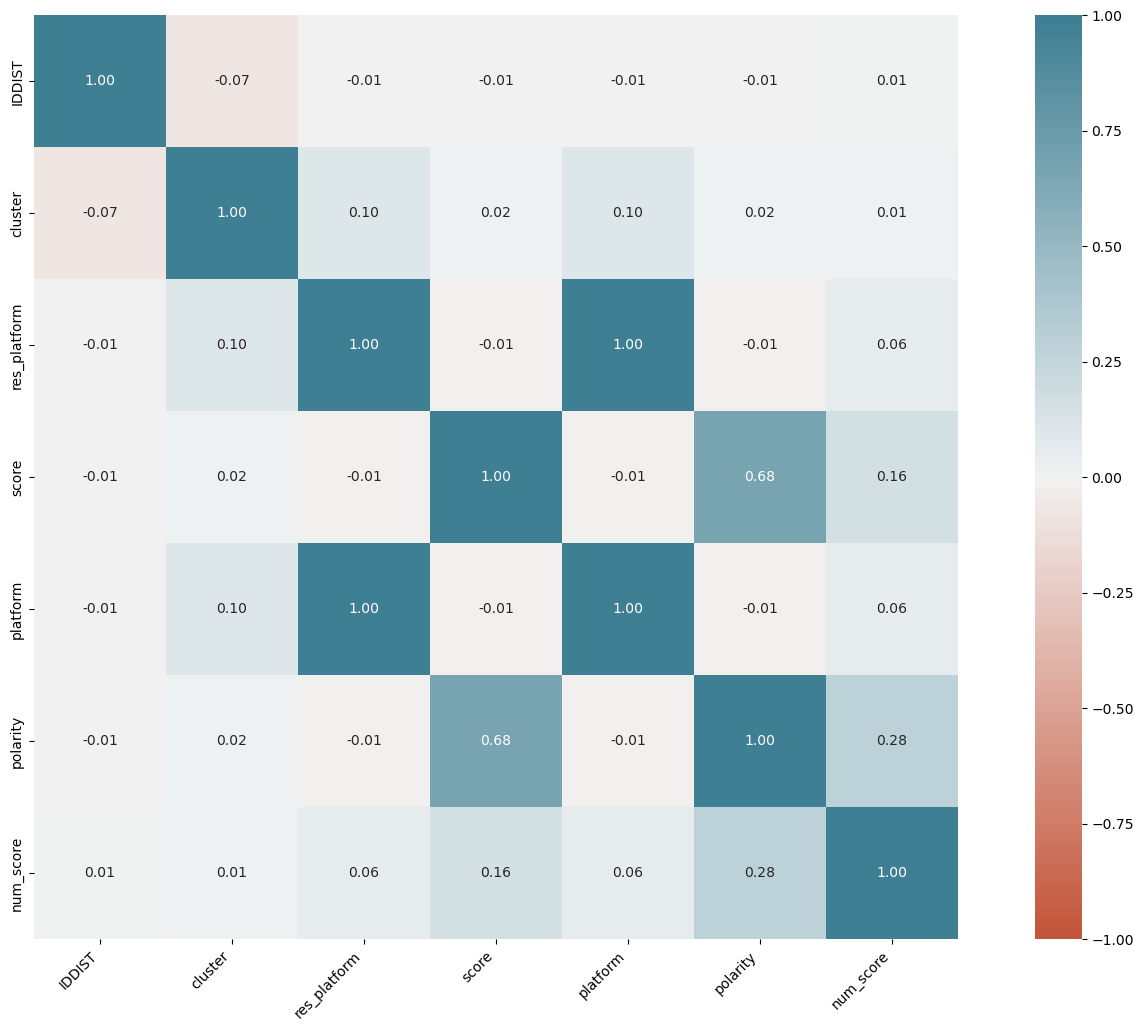

In [20]:
# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)